In [102]:
import pandas as pd
import numpy as np

col_names=['sepal length','sepal width','petal length','petal width','iris'] 
df=pd.read_csv('C:\\Users\\deeksha.aneja\\Desktop\\jigsaw\\dsProjects\\iris\\iris_data.csv',names=col_names, header=None)
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [108]:
df.groupby('iris').size()

iris
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

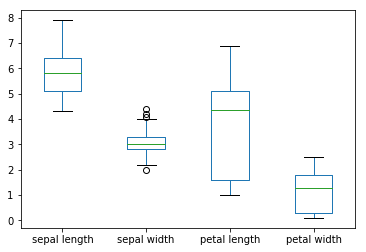

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

df.plot(kind='box', sharex=False, sharey=False)


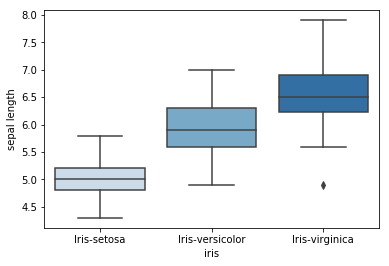

In [116]:
sns.boxplot( x=df["iris"], y=df["sepal length"], palette="Blues")


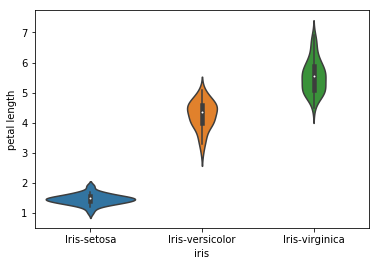

In [120]:
sns.violinplot(data=df,x="iris", y="petal length")


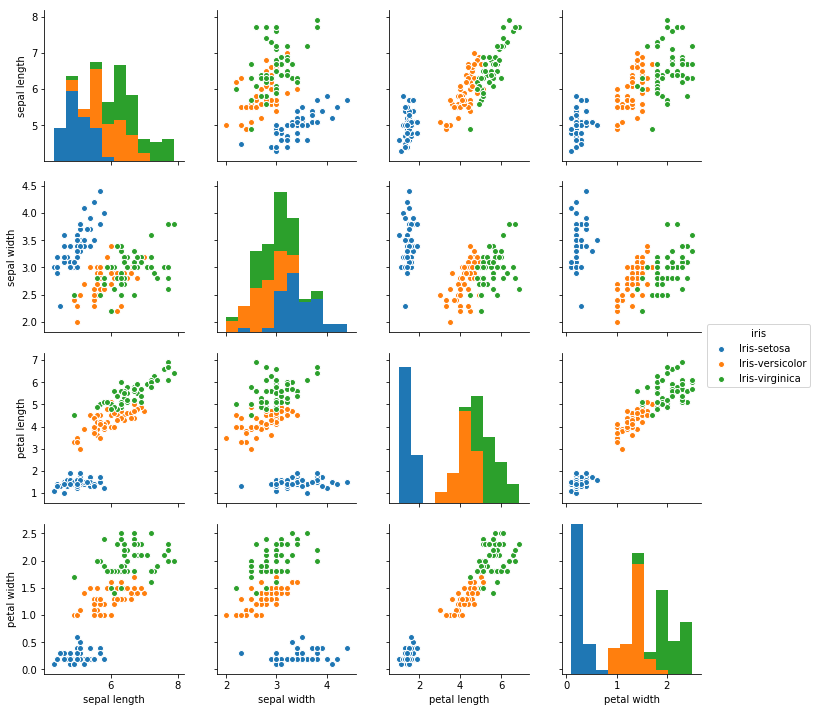

In [121]:
sns.pairplot(df, hue="iris")


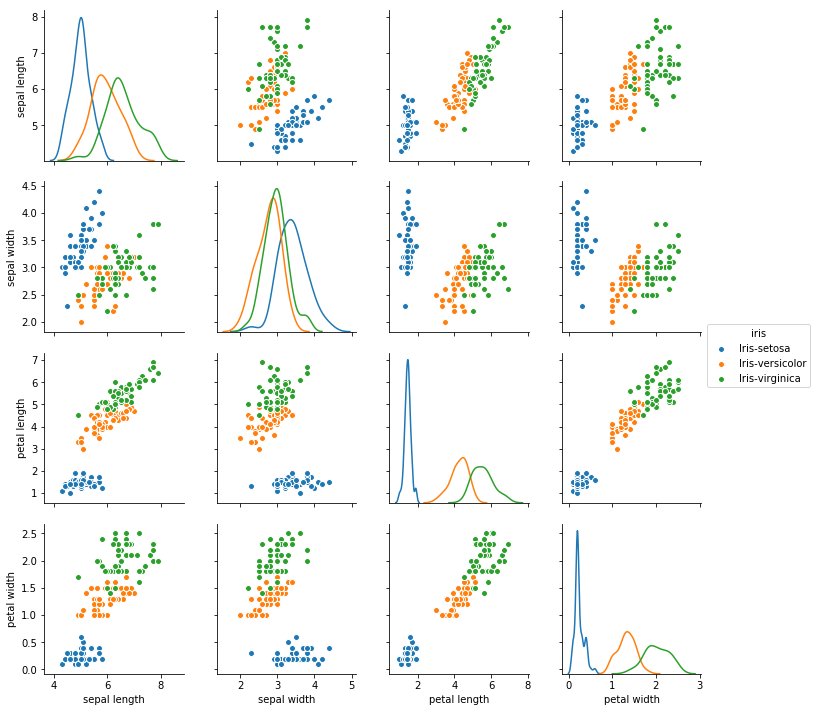

In [124]:
# updating the diagonal elements in a pairplot to show a kde(kernel density estimation)
sns.pairplot(df, hue="iris",diag_kind="kde")

In [125]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X=sc.fit_transform(df.drop('iris',1))
le=LabelEncoder()
y=df['iris']
# print (y)
y=le.fit_transform(y)
print (y.shape)

# print (X.shape)
# y

(150,)


In [126]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
print(X_train.shape,y_train.shape)
# y_train

(105, 4) (105,)


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


lr=LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5)
# lr=RandomForestClassifier()
print(X_train.shape,y_train.shape)
lr.fit(X_train,y_train)

y_predicted = lr.predict(X_test)
# Test Accuracy (RF)
print(metrics.accuracy_score(y_test, y_predicted))

(105, 4) (105,)
0.9777777777777777


In [133]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
